In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data excel yang sudah di proses
ds = pd.read_excel('Data_Proses_New.xlsx')
ds.to_numpy()
ds

,Unnamed: 0,Text,Label,Stem_Text
0,0,RT @SINDOnews: Trafik Data Layanan XL Axiata N...,NETRAL,trafik data layan xl axiata pilpres
1,1,RT @SINDOnews: Pantau Ujian Nasional Tingkat S...,NETRAL,pantau uji nasional tingkat smp sd harap hatta...
2,2,RT @SINDOnews: BPN Prabowo-Sandi: Pemilu 2019 ...,NETRAL,bpn prabowo sandi milu jujur adil transparan
3,3,RT @SINDOnews: Petugas KPPS di Lebak Banten Me...,NETRAL,tugas kpps lebak banten tinggal salat shubuh
4,4,RT @SINDOnews: PNM Salurkan Pembiayaan Sepanja...,NETRAL,pnm salur biaya kuartal i capai rp triliun
...,...,...,...,...
2995,2995,@askmenfess Diam kau peri cantek alias pantek,UMPATAN,diam kau peri cantek alias pantek
2996,2996,@HacktivisMca @Rusli_Unoe mohon jgn cuma diblo...,UMPATAN,mohon jgn blokir bang pantek ubunnya biar ga b...
2997,2997,"Dasar pantek lah \nWifi bayar mahal mahal, dip...",UMPATAN,dasar pantek wifi bayar mahal mahal dipake pus...
2998,2998,@tapiSUKSES Padek bana pantek e mah daa\nWkwkw,UMPATAN,padek bana pantek e mah daa wkwkw


In [3]:
# Setup X untuk stem, y untuk Label
X = list()
y = list()
for i, r in ds.iterrows():
    X.append(str(r['Stem_Text']))
    y.append(r['Label'])

In [4]:
# Menampilkan list stem + label
data = {'stem':list(), 'label':list()}
for xt in range(len(X)):
    data['stem'].append(X[xt])
    data['label'].append(y[xt])
data = pd.DataFrame(data)
data

,stem,label
0,trafik data layan xl axiata pilpres,NETRAL
1,pantau uji nasional tingkat smp sd harap hatta...,NETRAL
2,bpn prabowo sandi milu jujur adil transparan,NETRAL
3,tugas kpps lebak banten tinggal salat shubuh,NETRAL
4,pnm salur biaya kuartal i capai rp triliun,NETRAL
...,...,...
2995,diam kau peri cantek alias pantek,UMPATAN
2996,mohon jgn blokir bang pantek ubunnya biar ga b...,UMPATAN
2997,dasar pantek wifi bayar mahal mahal dipake pus...,UMPATAN
2998,padek bana pantek e mah daa wkwkw,UMPATAN


In [5]:
## Menghitung setiap jumlah Netral, Pornografi dan Umpatan yang ada di data
label_netral = 0
label_pornografi  = 0
label_umpatan = 0

_datasets = list()

for index, row in data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == 'NETRAL'):
            label_netral += 1
        elif(row['label'] == 'PORNOGRAFI'):
            label_pornografi += 1
        else:
            label_umpatan  += 1

        ## Append array train_data
        to_append = {
            'Stem_Text' : row['stem'],
            'Label' : row['label']
        }
        _datasets.append(to_append)
print('============================ DATA ===============================')     
print('Total Label NETRAL = ', label_netral)
print('Total Label PORNOGRAFI = ', label_pornografi)
print('Total Label UMPATAN = ', label_umpatan)
print('=================================================================')

============================ DATA ===============================
Total Label NETRAL =  1000
Total Label PORNOGRAFI =  1000
Total Label UMPATAN =  1000


In [6]:
# set random data proses
random_data = data.sample(n=len(data.index), replace=False, random_state=42)
random_data

,stem,label
1801,kontol,PORNOGRAFI
1190,tolak takut lepas,PORNOGRAFI
1817,mati kontol maksud,PORNOGRAFI
251,mayoritas responden dapat emansipasi perempuan...,NETRAL
2505,mulut lu kayak puki,UMPATAN
...,...,...
1638,dear lo ngentot sinyal gw ga jalan download ap...,PORNOGRAFI
1095,cewek cewek asrama putri bugil narsis depan ka...,PORNOGRAFI
1130,lucinta luna temu deddy corbuzier nang bugil l...,PORNOGRAFI
1294,dm gua ga porno ya bngst bersih lo ubek ubek aja,PORNOGRAFI


In [7]:
# simpan hasil random data proses
random_data.to_excel('Data_Proses_Random_New.xlsx')

# Data Proses dibagi dua

In [8]:
# data_proses_random dibagi menjadi dua (train & test)
# Setup X & y 
X = list()
y = list()

df = pd.read_excel('Data_Proses_Random_New.xlsx')

for i, r in df.iterrows():
    X.append(str(r['stem']))
    y.append(r['label'])

In [9]:
# Split data train and data test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=0.2) ## Split data 80:20 -> Random state bisa di atur jika ingin random

In [10]:
# Visualisasi Train Data
train_data = {'stem':list(), 'label':list()}
for xt in range(len(X_train)):
    train_data['stem'].append(X_train[xt])
    train_data['label'].append(y_train[xt])
train_data = pd.DataFrame(train_data)
# simpan data training
train_data.to_excel('Data_Train_Random_New.xlsx')
train_data

,stem,label
0,bawaslu henti bobol kotak suara,NETRAL
1,kerja ya ko pantek,UMPATAN
2,marcelo real madrid rumah,NETRAL
3,jelang selesai milu rsud rsj layan khusus cale...,NETRAL
4,partai data suara raih partai karya dar angka ...,NETRAL
...,...,...
2395,follback puki,UMPATAN
2396,bawaslu situs blokir lantar netral,NETRAL
2397,kontol,PORNOGRAFI
2398,banyak kontol ga bagus mas,PORNOGRAFI


In [11]:
## Menghitung jumlah kata netral, pornografi dan umpatan pada data train 
train_label_netral = 0
train_label_pornografi = 0
train_label_umpatan = 0

train_datasets = list()

for index, row in train_data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == 'NETRAL'):
            train_label_netral += 1
        elif(row['label'] == 'PORNOGRAFI'):
            train_label_pornografi += 1
        else:
            train_label_umpatan += 1

        ## Append array train_data
        to_append = {
            'stem' : row['stem'],
            'label' : row['label']
        }
        train_datasets.append(to_append)
print('============================ TRAIN DATA ===============================')     
print('Total Label Netral = ', train_label_netral)
print('Total Label Pornografi = ', train_label_pornografi)
print('Total Label umpatan = ', train_label_umpatan)
print('=======================================================================')

============================ TRAIN DATA ===============================
Total Label Netral =  797
Total Label Pornografi =  799
Total Label umpatan =  804


In [12]:
# Visualisasi Test Data
test_data = {'stem':list(), 'label':list()}
for xt in range(len(X_test)):
    test_data['stem'].append(X_test[xt])
    test_data['label'].append(y_test[xt])
test_data = pd.DataFrame(test_data)
# simpan data test
test_data.to_excel('Data_Test_Random_New.xlsx')
test_data

,stem,label
0,it is but im not into insect porno hujuhu,PORNOGRAFI
1,busted nonton seru ayo buru download blued,PORNOGRAFI
2,kejap bintang porno kenal indo udah gitu angga...,PORNOGRAFI
3,abai jantan sundal tu hahaha,UMPATAN
4,korea selatan legenda pus jempol porno,PORNOGRAFI
...,...,...
595,malas betina sundal ni klinik bwh opis kau kau...,UMPATAN
596,dkt ikea clearkan meja orang keliling pandang ...,UMPATAN
597,ribet klo bencong aja jancuk,UMPATAN
598,nyadar lance genit bgt cewe kontol,PORNOGRAFI


In [13]:
# menghitung jumlah data netral, pornografi, umpatan pada data test
test_label_netral = 0
test_label_pornografi = 0
test_label_umpatan = 0 

test_datasets = list()

for index, row in test_data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == 'NETRAL'):
            test_label_netral +=1
        elif(row['label'] == 'PORNOGRAFI'):
            test_label_pornografi +=1
        else:
            test_label_umpatan +=1
        
        #append data array ke dalam test_dataset       
        to_append = {
            'stem' : row['stem'],
            'label' : row['label']
        }
        test_datasets.append(to_append)
print('============================ TEST DATA ===============================')     
print('Total Label Netral = ', test_label_netral)
print('Total Label Pornografi = ', test_label_pornografi)
print('Total Label umpatan = ', test_label_umpatan)
print('=======================================================================')

============================ TEST DATA ===============================
Total Label Netral =  203
Total Label Pornografi =  201
Total Label umpatan =  196


# TF-IDF Kata (Stem)

In [14]:
# proses tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm='l2') # Membuat TF ID-F Vectorizer
response   = vectorizer.fit_transform(X_train) # mendapatkan kata dari data train
print(response)

  (0, 5470)	0.31888543459196855
  (0, 2995)	0.455710686066567
  (0, 799)	0.520138999919285
  (0, 2108)	0.5044488240196814
  (0, 563)	0.40697254811345257
  (1, 4233)	0.357440971496877
  (1, 2892)	0.6146066232368557
  (1, 6302)	0.4390807427562573
  (1, 2789)	0.5492747508391149
  (2, 4928)	0.3993678611956096
  (2, 3350)	0.5515333431908858
  (2, 4778)	0.4462983650709603
  (2, 3458)	0.580632458727306
  (3, 6139)	0.1492951711239475
  (3, 3202)	0.19085899728673994
  (3, 5904)	0.18159689215704083
  (3, 4768)	0.23442080181245165
  (3, 4426)	0.2712546050354968
  (3, 1764)	0.4120259226376724
  (3, 975)	0.4281970793547108
  (3, 2826)	0.20849762173245528
  (3, 3157)	0.2140985396773554
  (3, 4916)	0.2712546050354968
  (3, 4917)	0.2712546050354968
  (3, 3619)	0.31116979452672255
  :	:
  (2394, 4233)	0.2089938456602865
  (2395, 1711)	0.9223071437943882
  (2395, 4648)	0.38645767233403194
  (2396, 3134)	0.5211914080854247
  (2396, 3865)	0.50168107989643
  (2396, 5322)	0.40355239228171635
  (2396, 776)	0

In [15]:
# Untuk memperoleh feature name kata

feature_names = vectorizer.get_feature_names_out()
#feature_names

In [16]:
# bentuk dataframe
data = pd.DataFrame(response.todense().T,
                    index = feature_names,
                    columns=[f'D{i+1}' for i in range(len(X_train))])

data

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D2391,D2392,D2393,D2394,D2395,D2396,D2397,D2398,D2399,D2400
aaaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaaaaah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaaaaannnnnnn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zonasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# TF-IDF Label

In [17]:
train_data= pd.read_excel('Data_Train_Random_New.xlsx')
train_data['Num_words_text'] = train_data['stem'].apply(lambda x:len(str(x).split())) 
print('-------Train data--------')
print(train_data['label'].value_counts())
print(len(train_data))
print('-------------------------')

test_data= pd.read_excel('Data_Test_Random_New.xlsx')
print('-------Test data--------')
print(test_data['label'].value_counts())
print(len(test_data))
print('-------------------------')

-------Train data--------
UMPATAN       804
PORNOGRAFI    799
NETRAL        797
Name: label, dtype: int64
2400
-------------------------
-------Test data--------
NETRAL        203
PORNOGRAFI    201
UMPATAN       196
Name: label, dtype: int64
600
-------------------------


In [18]:
import tensorflow as tf

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# jumlah teks Tokenizer
num_words = 20000

# Detail here : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer#texts_to_sequences
# Untuk dirubah menjadi tensorflow tokenizer
tokenizer = Tokenizer(num_words=num_words,oov_token="unk") ## unk = unknown
tokenizer.fit_on_texts(train_data['stem'].tolist())

In [19]:
# Membagi data train ke validation
X_train, X_valid, y_train, y_valid = train_test_split(train_data['stem'].tolist(),
                                                      train_data['label'].tolist(),
                                                      test_size=0.2, #80 Train : 20 Validation
                                                      )
print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

# text convert to vector
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['stem'].tolist()) )

#Panjang setiap dokumen
max_len = 50

#Membuat sequence train, test, validation
x_train = pad_sequences(x_train, padding='post', maxlen=max_len)
x_valid = pad_sequences(x_valid, padding='post', maxlen=max_len)
x_test = pad_sequences(x_test, padding='post', maxlen=max_len)
print(x_train[2])

# proses convert train_label dengan keras ke vector 
# shape
le = LabelEncoder()

#Transform label encoder dari string ke integer
train_labels = le.fit_transform(y_train)
print(train_labels)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

# print(train_labels)
valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

# convert test_label to vector
test_labels = le.transform(test_data['label'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)
# print(test_labels)

# Membuat dataset tensorflow dari data yang sudah ada (data training, validation, test)
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))
#print(train_ds)

Train data len:1920
Class distributionCounter({'PORNOGRAFI': 641, 'UMPATAN': 640, 'NETRAL': 639})
Valid data len:480
Class distributionCounter({'UMPATAN': 164, 'PORNOGRAFI': 158, 'NETRAL': 158})
[3508  705   10    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
[2 2 1 ... 2 1 2]


<ipython-input-19-b22be2d0775c>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train) )
<ipython-input-19-b22be2d0775c>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
<ipython-input-19-b22be2d0775c>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

In [20]:
# train label (Label Encoder)

print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

['UMPATAN', 'UMPATAN', 'PORNOGRAFI', 'PORNOGRAFI', 'UMPATAN', 'PORNOGRAFI', 'NETRAL', 'UMPATAN', 'NETRAL', 'NETRAL']
Text to number
[2 2 1 1 2 1 0 2 0 0]


# Algortima CNN + LSTM

In [21]:
from tensorflow.keras import Sequential #Berurutan
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Dense, LSTM #Ngeload out layer-layer
from tensorflow.keras.losses import CategoricalCrossentropy #Loss function berdasarkan kategorikal

In [22]:
max_features    = num_words
embedding_dim   = 64
sequence_length = max_len

model = Sequential()
#Model CNN
model.add(Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005))) #Reduce loss                                   

# Filter, kernel size (128, 3)
model.add(Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               

#Nilai maksimal
model.add(MaxPooling1D())

#Model LSTM
model.add(LSTM(100)) #LSTM with 100 neuron

model.add(Dropout(0.5))

#Akhir dari layer CNN + LSTM
model.add(Dense(3, activation='softmax', 
                kernel_regularizer=regularizers.l2(0.001), 
                bias_regularizer=regularizers.l2(0.001)))
                               
model.summary()
model.compile(loss=CategoricalCrossentropy(from_logits=False), optimizer='Adam', metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            1280064   
                                                                 
 conv1d (Conv1D)             (None, 48, 128)           24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                        

In [23]:
epochs     = 100
batch_size = 128
# Fit the model using the train and test datasets.

history = model.fit(train_ds.batch(batch_size),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(batch_size),
                    verbose=1)

Epoch 1/100
15/15 [==============================] - 6s 181ms/step - loss: 1.5031 - accuracy: 0.3214 - val_loss: 1.3353 - val_accuracy: 0.3292
Epoch 2/100
15/15 [==============================] - 2s 131ms/step - loss: 1.2513 - accuracy: 0.3333 - val_loss: 1.1824 - val_accuracy: 0.3417
Epoch 3/100
15/15 [==============================] - 2s 127ms/step - loss: 1.1559 - accuracy: 0.3151 - val_loss: 1.1325 - val_accuracy: 0.3375
Epoch 4/100
15/15 [==============================] - 2s 132ms/step - loss: 1.1243 - accuracy: 0.3432 - val_loss: 1.1191 - val_accuracy: 0.3354
Epoch 5/100
15/15 [==============================] - 2s 125ms/step - loss: 1.1167 - accuracy: 0.3271 - val_loss: 1.1141 - val_accuracy: 0.3500
Epoch 6/100
15/15 [==============================] - 2s 128ms/step - loss: 1.1132 - accuracy: 0.3276 - val_loss: 1.1073 - val_accuracy: 0.4563
Epoch 7/100
15/15 [==============================] - 2s 135ms/step - loss: 0.9148 - accuracy: 0.4911 - val_loss: 0.6075 - val_accuracy: 0.6646

In [24]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


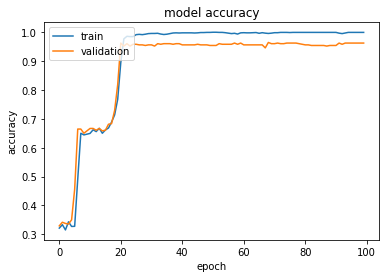

In [25]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

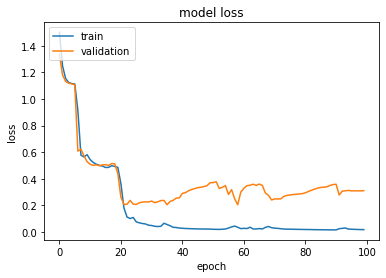

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Save Model to JSON

In [27]:
model.save('/content/drive/MyDrive/Model/cnnmodel') 
json_string = tokenizer.to_json()

In [28]:
import json
with open('/content/drive/MyDrive/Model/tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

# Load Model setelah Save

In [29]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Model/cnnmodel')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            1280064   
                                                                 
 conv1d (Conv1D)             (None, 48, 128)           24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                        

In [30]:
with open('/content/drive/MyDrive/Model/tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [31]:
# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
# print("Generate predictions for all samples")
predictions = new_model.predict(x_test)
# print(predictions)
predict_results = predictions.argmax(axis=1)

19/19 [==============================] - 1s 15ms/step


In [32]:
# Tambahkan hasil ke Data Frame test_data dan merubahnya kembali sesuai dengan label nya
test_data['pred_label'] = predict_results
test_data['pred_label'] = le.inverse_transform(test_data.pred_label)

In [33]:
test_data

,Unnamed: 0,stem,label,pred_label
0,0,it is but im not into insect porno hujuhu,PORNOGRAFI,PORNOGRAFI
1,1,busted nonton seru ayo buru download blued,PORNOGRAFI,PORNOGRAFI
2,2,kejap bintang porno kenal indo udah gitu angga...,PORNOGRAFI,PORNOGRAFI
3,3,abai jantan sundal tu hahaha,UMPATAN,UMPATAN
4,4,korea selatan legenda pus jempol porno,PORNOGRAFI,PORNOGRAFI
...,...,...,...,...
595,595,malas betina sundal ni klinik bwh opis kau kau...,UMPATAN,UMPATAN
596,596,dkt ikea clearkan meja orang keliling pandang ...,UMPATAN,UMPATAN
597,597,ribet klo bencong aja jancuk,UMPATAN,UMPATAN
598,598,nyadar lance genit bgt cewe kontol,PORNOGRAFI,PORNOGRAFI


In [34]:
print(classification_report(test_data['label'].tolist(),test_data['pred_label'].tolist()))

              precision    recall  f1-score   support

      NETRAL       0.94      0.99      0.96       203
  PORNOGRAFI       0.98      0.97      0.97       201
     UMPATAN       0.99      0.95      0.97       196

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

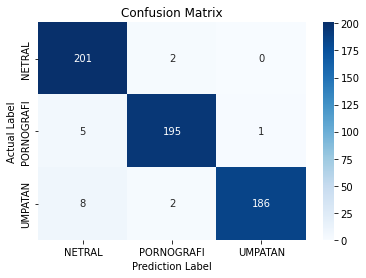

In [36]:
Confusion_matrix = confusion_matrix(test_data['label'].tolist(), test_data['pred_label'].tolist())
class_label      = le.inverse_transform([0,1,2])
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)

sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()